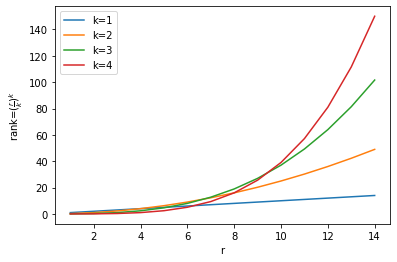

In [15]:
import matplotlib.pyplot as plt

# Define values for r
r_values = range(1, 15)

# Define values for k
k_values = range(1, 5)

# Loop through k values and plot (r/k)^k for each value
for k in k_values:
    y_values = [(r / k) ** k for r in r_values]
    plt.plot(r_values, y_values, label=f"k={k}")

# Add labels and legend to the plot
plt.xlabel("r")
plt.ylabel("rank=$(\\frac{r}{k})^k$")
plt.legend()

# Show the plot
plt.show()
